# Build dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import afdetection.utils.paths as path
from afdetection.data.make_dataset import MakeDataset

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

sns.set_theme()

In [7]:
from afdetection.data.make_dataset import MakeDataset
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

make_data = MakeDataset()
dataset_DIR = path.data_raw_dir('dataset.csv')
dataset = make_data.read_from_csv(dataset_DIR)

X = dataset.drop(['diagnosi', 'ritmi'], axis=1)
# Mean imputation
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp_mean.fit_transform(X)

# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-1.89552439e+00 -1.50858397e+00 -2.04612968e+00 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]
 [-1.89552439e+00 -1.50858397e+00 -2.04612968e+00 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]
 [-3.89123784e-01  1.14078139e+00 -7.06695052e-01 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]
 ...
 [ 6.73820396e-01 -4.70745466e-01  7.15314029e-01 ...  1.04422531e+00
  -5.14808661e-15 -1.37698677e-15]
 [ 1.13496862e+00  9.13106241e-01  1.08108461e+00 ...  1.04422531e+00
   1.84820846e+00  9.84293004e-01]
 [-1.53858721e-01 -2.23273334e-02 -1.69247663e-01 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]]


In [2]:
make_data = MakeDataset()
tab_data_DIR = path.data_raw_dir('coorteeqsrafva.csv')
metadata = make_data.read_from_csv(tab_data_DIR, sep=';')

general_metadata = [
    'age', 
    'sex', 
    'height',
    'weight', 
]

diagnostic = [
    'diagnosi',
    'ritmi'
]

metadata = metadata[general_metadata + diagnostic]
print('shape: {}'.format(metadata.shape))
display(metadata.head())

shape: (6428, 6)


,age,sex,height,weight,diagnosi,ritmi
0,54.00,0,NaN,NaN,STACH,VA
1,54.00,0,NaN,NaN,AFLT,AF
2,55.00,0,NaN,NaN,SR,SR
3,29.00,1,164.00,56.00,STACH,VA
4,57.00,0,NaN,NaN,SBRAD,VA


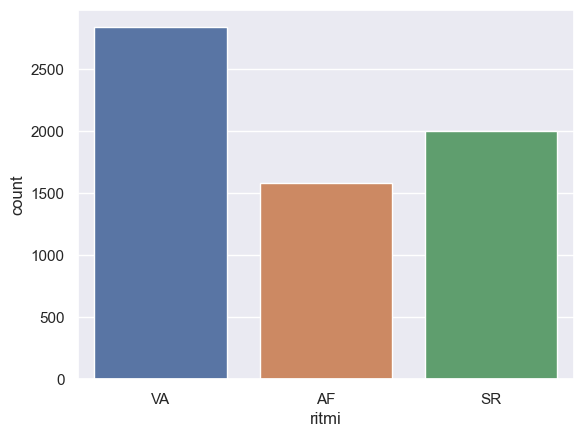

In [3]:
sns.countplot(data=metadata, x='ritmi')
plt.show()

In [4]:
make_data = MakeDataset()
ecg_data_DIR = path.data_raw_dir('ecg_features_spectral_entropy.csv')
ecg_features = pd.read_csv(ecg_data_DIR)
print('shape: {}'.format(ecg_features.shape))
display(ecg_features.head())

shape: (6428, 12)


,I_spec_entropy,II_spec_entropy,III_spec_entropy,aVF_spec_entropy,aVR_spec_entropy,aVL_spec_entropy,V1_spec_entropy,V2_spec_entropy,V3_spec_entropy,V4_spec_entropy,V5_spec_entropy,V6_spec_entropy
0,1.68,1.75,2.27,1.62,1.80,3.69,2.77,1.65,1.70,1.72,1.67,1.67
1,1.68,1.75,2.27,1.62,1.80,3.69,2.77,1.65,1.70,1.72,1.67,1.67
2,2.51,3.01,4.41,2.72,2.44,3.53,2.68,2.49,2.55,2.56,2.61,2.62
3,1.15,1.77,2.47,1.31,1.09,3.13,0.86,0.93,1.49,1.63,1.02,0.96
4,3.61,3.44,3.89,3.53,3.72,3.45,3.56,3.56,3.54,3.54,3.57,3.56


In [5]:
data = pd.concat([ecg_features, metadata], axis=1)

data_DIR = path.data_raw_dir('dataset.csv')
data.to_csv(data_DIR, index=False)

# Validate some estimators

In [6]:
X = data.drop(['diagnosi', 'ritmi'], axis=1)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp_mean.fit_transform(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = data['ritmi']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(X)
print(y)

[[-2.04989576e+00 -1.89552439e+00 -1.50858397e+00 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]
 [-2.04989576e+00 -1.89552439e+00 -1.50858397e+00 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]
 [-1.01860277e+00 -3.89123784e-01  1.14078139e+00 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]
 ...
 [-4.93124800e-02  6.73820396e-01 -4.70745466e-01 ...  1.04422531e+00
  -5.14808661e-15 -1.37698677e-15]
 [ 1.25747944e+00  1.13496862e+00  9.13106241e-01 ...  1.04422531e+00
   1.84820846e+00  9.84293004e-01]
 [-2.07018959e-01 -1.53858721e-01 -2.23273334e-02 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]]
[2 0 1 ... 1 0 1]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
display(models)

100%|██████████| 29/29 [00:33<00:00,  1.15s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.68,0.69,None,0.68,5.63
SVC,0.66,0.68,None,0.66,3.36
ExtraTreesClassifier,0.67,0.68,None,0.67,1.06
XGBClassifier,0.67,0.68,None,0.66,3.22
LGBMClassifier,0.67,0.67,None,0.67,0.93
NuSVC,0.64,0.66,None,0.64,4.75
BaggingClassifier,0.64,0.65,None,0.64,1.04
AdaBoostClassifier,0.63,0.64,None,0.63,0.87
QuadraticDiscriminantAnalysis,0.57,0.62,None,0.53,0.04
